In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pingouin as pg
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# fm._get_fontconfig_fonts()
# font_location = "./Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf"
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

complain = pd.read_csv("../data/complain/region_type.csv", encoding="cp949")
complain_df = pd.DataFrame(complain[complain['신고유형중분류명'] != '전체'])

# 지자체, 신고유형 인코딩
le1 = LabelEncoder()
le2 = LabelEncoder()
complain_df['광역지자체_코드'] = le1.fit_transform(complain_df['광역지자체'])
complain_df['신고유형_코드'] = le2.fit_transform(complain_df['신고유형중분류명'])

In [5]:
tmp = {}
for prov_code, prov in zip(complain_df['광역지자체_코드'], complain_df['광역지자체']):
    tmp[prov_code] = prov
for k, v in sorted(list(tmp.items())):
    print(k, v)

0 강원특별자치도
1 경기도
2 경상남도
3 경상북도
4 광주광역시
5 대구광역시
6 대전광역시
7 부산광역시
8 서울특별시
9 울산광역시
10 인천광역시
11 전라남도
12 전북특별자치도
13 제주특별자치도
14 충청남도
15 충청북도


In [6]:
tmp = {}
for cat_code, cat in zip(complain_df['신고유형_코드'], complain_df['신고유형중분류명']):
    tmp[cat_code] = cat
for k, v in sorted(list(tmp.items())):
    print(k, v)

0 공항/항공
1 관광종사원
2 국내여행업
3 국내외여행업
4 기타
5 모텔/게스트하우스
6 버스
7 분실/도난
8 쇼핑
9 안내표지판
10 음식점
11 일반숙소
12 종합여행업
13 철도/선박
14 캠핑장
15 콘도
16 콜밴
17 택시
18 호스텔
19 호텔


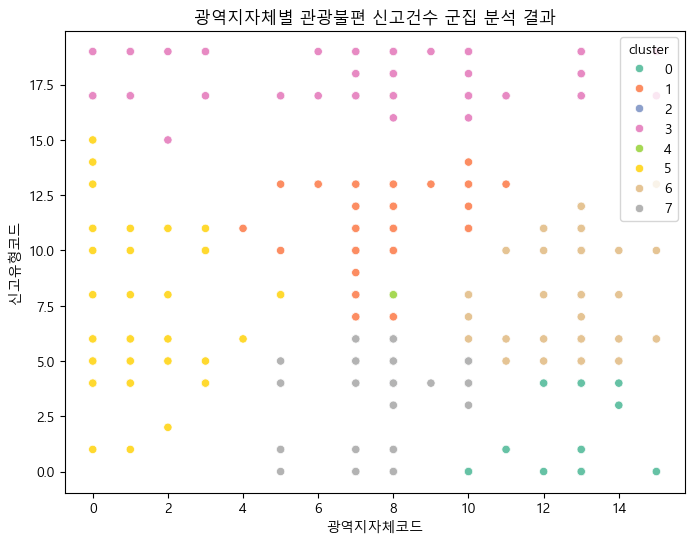

In [7]:
# 변수 선택
X = complain_df[['광역지자체_코드', '신고유형_코드', '신고 건수']]

# 만들기
kmeans = KMeans(n_clusters=8, random_state=0)
complain_df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='광역지자체_코드', y='신고유형_코드', hue='cluster', data=complain_df, palette='Set2')
plt.title('광역지자체별 관광불편 신고건수 군집 분석 결과')
plt.xlabel('광역지자체코드')
plt.ylabel('신고유형코드')
plt.show()

In [8]:
expenditure = pd.read_csv("../data/expenditure/expd_hitmap.csv", encoding="cp949")
print(expenditure)

      광역지자체           소비액      전년동기 소비액  전년대비 소비증감률
0     서울특별시  1.196274e+10  1.258112e+10        -4.9
1     부산광역시  3.141609e+09  3.181648e+09        -1.3
2     대구광역시  1.896082e+09  1.920804e+09        -1.3
3     인천광역시  2.020811e+09  1.987435e+09         1.7
4     광주광역시  9.266937e+08  9.650830e+08        -4.0
5     대전광역시  1.659132e+09  1.676814e+09        -1.1
6     울산광역시  5.621280e+08  5.787463e+08        -2.9
7   세종특별자치시  1.018737e+08  1.049133e+08        -2.9
8       경기도  9.429436e+09  9.716020e+09        -2.9
9      충청북도  1.035111e+09  1.072608e+09        -3.5
10     충청남도  1.185925e+09  1.225232e+09        -3.2
11     전라남도  9.717599e+08  9.954530e+08        -2.4
12     경상북도  1.247994e+09  1.294071e+09        -3.6
13     경상남도  1.548171e+09  1.579061e+09        -2.0
14  제주특별자치도  9.545205e+08  1.122437e+09       -15.0
15  강원특별자치도  1.273023e+09  1.356539e+09        -6.2
16  전북특별자치도  7.186339e+08  7.311347e+08        -1.7


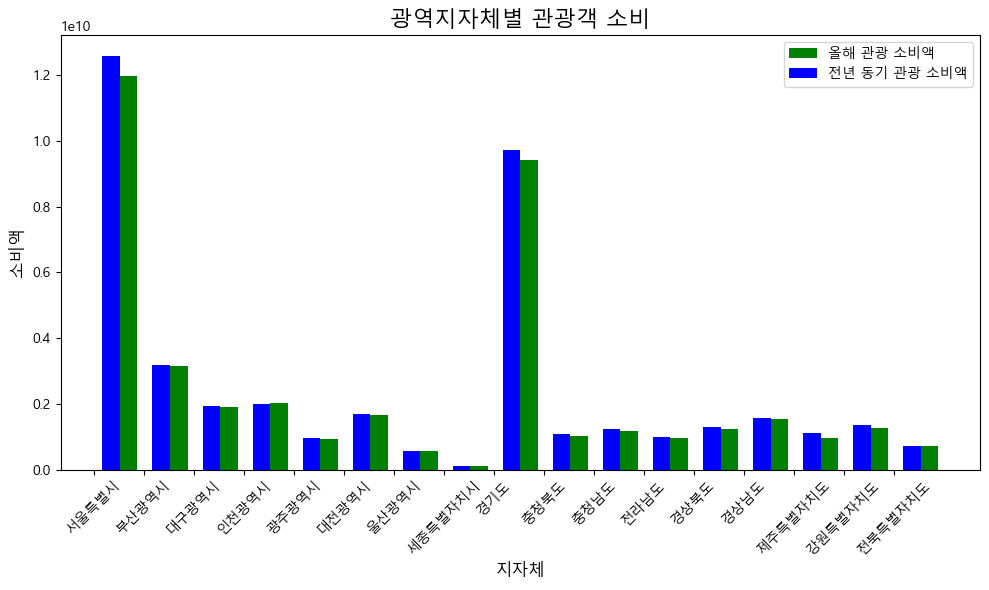

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.DataFrame(expenditure)
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(df['광역지자체']))

plt.bar(index, df['소비액'], bar_width, label='올해 관광 소비액', color='g')

plt.bar(index - bar_width, df['전년동기 소비액'], bar_width, label='전년 동기 관광 소비액', color='b')

plt.title('광역지자체별 관광객 소비', fontsize=16)
plt.xlabel('지자체', fontsize=12)
plt.ylabel('소비액', fontsize=12)

plt.xticks(index - 0.7, df['광역지자체'], rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


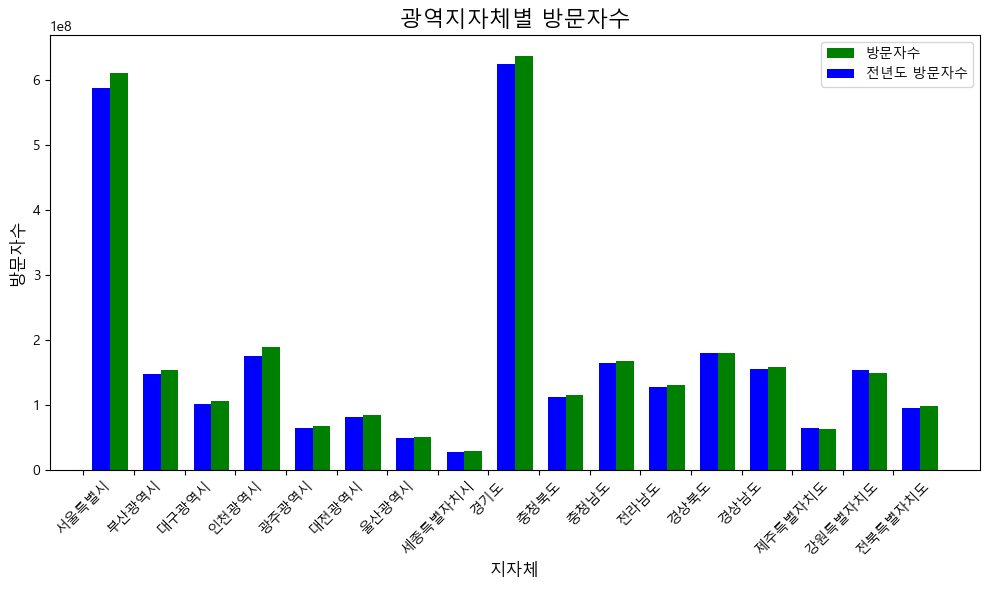

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

visitors = pd.read_csv("../data/visitors/20241001150144_방문자수.csv", encoding="cp949")

df = pd.DataFrame(visitors)
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(df['시도명']))

plt.bar(index, df['방문자수'], bar_width, label='방문자수', color='g')

plt.bar(index - bar_width, df['전년도 방문자수'], bar_width, label='전년도 방문자수', color='b')

plt.title('광역지자체별 방문자수', fontsize=16)
plt.xlabel('지자체', fontsize=12)
plt.ylabel('방문자수', fontsize=12)

plt.xticks(index - 0.7, df['시도명'], rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# 방문자수-소비액 상관분석
data = pd.read_csv("../data/visitors_expenditure.csv")
df = pd.DataFrame(data)
df = df[['방문자수', '소비액']]

# 정규성 검정
print(pg.normality(df['방문자수']))
print(pg.normality(df['소비액']))

             W      pval  normal
방문자수  0.649613  0.000033   False
            W      pval  normal
소비액  0.586124  0.000008   False


In [12]:
# 스피어만 상관분석
print(df.corr(method='spearman'))

          방문자수       소비액
방문자수  1.000000  0.781863
소비액   0.781863  1.000000


In [13]:
search = pd.read_csv("../data/search/20240929210636_지역별 검색건수.csv", encoding="cp949")
print(search)

       광역지자체    기초지자체  광역지자체 검색건수  광역지자체 검색건수 비율  기초지자체 검색건수  기초지자체 검색건수 비율
0    강원특별자치도      강릉시    34981314            6.9     5984318           17.1
1    강원특별자치도      고성군    34981314            6.9     2047046            5.9
2    강원특별자치도      동해시    34981314            6.9      961767            2.7
3    강원특별자치도      삼척시    34981314            6.9     1326099            3.8
4    강원특별자치도      속초시    34981314            6.9     5498913           15.7
..       ...      ...         ...            ...         ...            ...
248     충청북도  청주시 상당구    17159541            3.4     1577884            9.2
249     충청북도  청주시 서원구    17159541            3.4     1094719            6.4
250     충청북도  청주시 청원구    17159541            3.4     2048453           11.9
251     충청북도  청주시 흥덕구    17159541            3.4     3049132           17.8
252     충청북도      충주시    17159541            3.4     2588314           15.1

[253 rows x 6 columns]


      광역지자체  광역지자체 검색건수
0     인천광역시    35618054
1     대구광역시    15033488
2     서울특별시    73494782
3     울산광역시     7545693
4      전라남도    17405004
5      충청북도    17159541
6     광주광역시     7848832
7     부산광역시    26482424
8       경기도   152384436
9   전북특별자치도    13308393
10     충청남도    26458164
11     경상남도    24768223
12  세종특별자치시     3407216
13  제주특별자치도    14576690
14    대전광역시    11725447
15     경상북도    23057710
16  강원특별자치도    34981314


C:\Users\lee_hj\AppData\Local\Temp\ipykernel_16852\2892701330.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


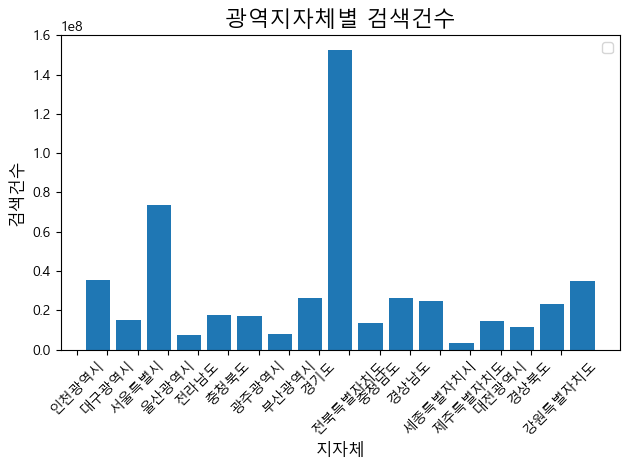

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.DataFrame(search)
tmp = list(set((list(zip(df['광역지자체'], df['광역지자체 검색건수'])))))
trim_data = {'광역지자체': [], '광역지자체 검색건수': []}
for prov, amt in tmp:
    trim_data['광역지자체'].append(prov)
    trim_data['광역지자체 검색건수'].append(amt)

trim_df = pd.DataFrame(trim_data)
print(trim_df)

# 그래프 만들기
index = np.arange(len(trim_data['광역지자체']))

plt.bar(index, trim_df['광역지자체 검색건수'])

plt.title('광역지자체별 검색건수', fontsize=16)
plt.xlabel('지자체', fontsize=12)
plt.ylabel('검색건수', fontsize=12)

plt.xticks(index-0.7, trim_df['광역지자체'], rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


<Axes: xlabel='평균 숙박일수', ylabel='평균 체류시간'>

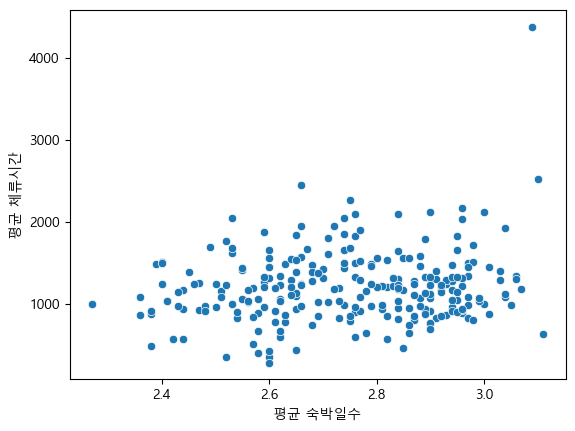

In [15]:
# 체류 시간과 숙박일 수 상관분석
staying = pd.read_csv('../data/staying/20241001152020_방문자 체류특성.csv', encoding='cp949')
# df = pd.DataFrame(staying)
sns.scatterplot(data=staying, x='평균 숙박일수', y='평균 체류시간')


In [16]:
print(pg.normality(staying['평균 숙박일수']))
print(pg.normality(staying['평균 체류시간']))

# 두 변수가 정규성을 띠지 않아 스피어만 상관분석 실시
df = pd.DataFrame(staying)[['평균 숙박일수', '평균 체류시간']]
print(df.corr(method='spearman'))

               W      pval  normal
평균 숙박일수  0.97126  0.000055   False
                W          pval  normal
평균 체류시간  0.898231  4.828002e-12   False
          평균 숙박일수   평균 체류시간
평균 숙박일수  1.000000  0.099304
평균 체류시간  0.099304  1.000000


In [17]:
data = pd.read_csv('data_set.csv')
df = pd.DataFrame(data)
df['price_index'] = df['price_index'].round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yyyymm           1156 non-null   object 
 1   province         1156 non-null   object 
 2   tourist_cnt      1156 non-null   float64
 3   mainstream_flag  1156 non-null   object 
 4   festival_flag    1156 non-null   object 
 5   new_accom_cnt    1156 non-null   int64  
 6   season           1156 non-null   object 
 7   price_index      1156 non-null   float64
 8   covid_flag       1156 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 81.4+ KB


In [18]:
df.head()

,yyyymm,province,tourist_cnt,mainstream_flag,festival_flag,new_accom_cnt,season,price_index,covid_flag
0,2019-01,서울특별시,50994190.0,Y,N,1,겨울,98.76,N
1,2019-02,서울특별시,45700000.0,Y,N,7,겨울,99.26,N
2,2019-03,서울특별시,62763858.0,Y,N,3,봄,99.06,N
3,2019-04,서울특별시,45600000.0,Y,N,3,봄,99.44,N
4,2019-05,서울특별시,53726633.0,Y,N,2,봄,99.49,N


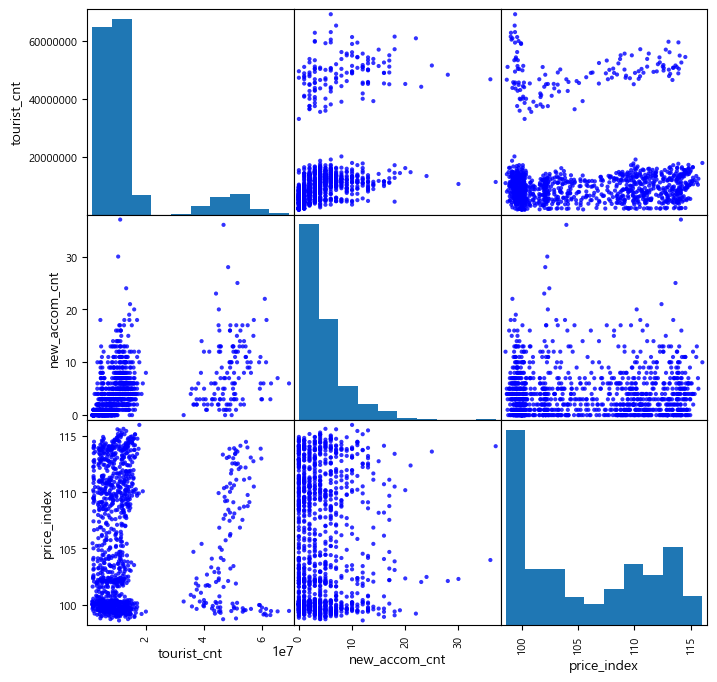

In [19]:
scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(8, 8), diagonal='hist', color='b')
 
plt.show()

In [20]:
corr_info = df.corr(numeric_only=True)
corr_info

,tourist_cnt,new_accom_cnt,price_index
tourist_cnt,1.000000,0.425816,0.023427
new_accom_cnt,0.425816,1.000000,0.013849
price_index,0.023427,0.013849,1.000000


In [21]:
# dummied_df = pd.get_dummies(df, columns=['mainstream_flag', 'festival_flag', 'season', 'covid_flag'], drop_first=True)
# dummied_df['main_accom'] = dummied_df['mainstream_flag_Y']*dummied_df['new_accom_cnt']
# dummied_df = dummied_df.replace({'True': 1, 'False': 0})
# dummied_df

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# x_data = dummied_df[['new_accom_cnt', 'price_index', 'mainstream_flag_Y', 'festival_flag_Y', 'season_겨울', 'season_봄', 'season_여름', 'covid_flag_Y', 'main_accom']]
# target = dummied_df[['tourist_cnt']]
# x_data = sm.add_constant(x_data, has_constant='add')
# model = sm.OLS(target, x_data)
# fit_model = model.fit()
# fit_model.summary()

ols_formula = 'tourist_cnt ~ C(mainstream_flag) + C(festival_flag) + new_accom_cnt + C(season) + price_index + C(covid_flag)'
OLS = ols(formula=ols_formula, data=df)
model = OLS.fit()
result = model.summary()
result


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tourist_cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     333.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          4.70e-293
Time:                        19:59:57   Log-Likelihood:                -19929.
No. Observations:                1156   AIC:                         3.988e+04
Df Residuals:                    1147   BIC:                         3.992e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.463e+07   5.18e+06      2.826      0.005    4.47e+06    2.48e+07
C(mainstream_flag)[T.Y]  2.651e+07   6.02e+05     44.039      0.000    2.53e+07    2.77e+07
C(festival_flag)[T.Y]   -5.334e+05   6.77e+05     -0.788      0.431   -1.86e+06    7.94e+05
C(season)[T.겨울]         -1.508e+06   6.63e+05     -2.275      0.023   -2.81e+06   -2.07e+05
C(season)[T.봄]          -8.315e+05   6.38e+05     -1.304      0.192   -2.08e+06     4.2e+05
C(season)[T.여름]         -6.763e+05   6.44e+05     -1.049      0.294   -1.94e+06    5.88e+05
C(covid_flag)[T.Y]      -2.858e+06   5.78e+05     -4.943      0.000   -3.99e+06   -1.72e+06
new_accom_cnt            6.252e+05   5.05e+04     12.369      0.000    5.26e+05    7.24e+05
price_index             -6.151e+04   4.77e+04     -1.289      0.198   -1.55e+05    3.21e+04
==============================================================================
Omnibus:                      195.649   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.695
Skew:                          -0.787   Prob(JB):                    4.73e-155
Kurtosis:                       6.503   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ols_formula2 = 'tourist_cnt ~ C(mainstream_flag) + C(festival_flag) + new_accom_cnt + C(season) + price_index + C(covid_flag) + \
    C(mainstream_flag) * new_accom_cnt'
OLS = ols(formula=ols_formula2, data=df)
model = OLS.fit()
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tourist_cnt   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     306.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          6.25e-298
Time:                        19:59:58   Log-Likelihood:                -19915.
No. Observations:                1156   AIC:                         3.985e+04
Df Residuals:                    1146   BIC:                         3.990e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1.546e+07   5.12e+06      3.021      0.003    5.42e+06    2.55e+07
C(mainstream_flag)[T.Y]                2.286e+07   9.03e+05     25.314      0.000    2.11e+07    2.46e+07
C(festival_flag)[T.Y]                 -4.134e+05   6.69e+05     -0.618      0.537   -1.73e+06    8.99e+05
C(season)[T.겨울]                       -1.432e+06   6.55e+05     -2.186      0.029   -2.72e+06   -1.47e+05
C(season)[T.봄]                        -8.129e+05    6.3e+05     -1.290      0.197   -2.05e+06    4.23e+05
C(season)[T.여름]                       -5.803e+05   6.37e+05     -0.911      0.363   -1.83e+06     6.7e+05
C(covid_flag)[T.Y]                    -2.884e+06   5.71e+05     -5.046      0.000      -4e+06   -1.76e+06
new_accom_cnt                          4.591e+05   5.88e+04      7.813      0.000    3.44e+05    5.74e+05
C(mainstream_flag)[T.Y]:new_accom_cnt  5.937e+05   1.11e+05      5.363      0.000    3.76e+05    8.11e+05
price_index                           -6.424e+04   4.72e+04     -1.362      0.173   -1.57e+05    2.83e+04
==============================================================================
Omnibus:                      165.956   Durbin-Watson:                   0.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.922
Skew:                          -0.611   Prob(JB):                    4.22e-155
Kurtosis:                       6.642   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
ols_formula3 = 'tourist_cnt ~ C(mainstream_flag) + C(festival_flag) + new_accom_cnt + C(season) + price_index + C(covid_flag) + \
    C(mainstream_flag) * new_accom_cnt + C(mainstream_flag) * festival_flag'
OLS = ols(formula=ols_formula3, data=df)
model = OLS.fit()
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tourist_cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          3.15e-299
Time:                        19:59:58   Log-Likelihood:                -19909.
No. Observations:                1156   AIC:                         3.984e+04
Df Residuals:                    1145   BIC:                         3.990e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   1.584e+07   5.09e+06      3.108      0.002    5.84e+06    2.58e+07
C(mainstream_flag)[T.Y]                     2.373e+07   9.34e+05     25.419      0.000    2.19e+07    2.56e+07
C(festival_flag)[T.Y]                        3.29e+05   3.67e+05      0.895      0.371   -3.92e+05    1.05e+06
C(season)[T.겨울]                            -1.493e+06   6.52e+05     -2.288      0.022   -2.77e+06   -2.13e+05
C(season)[T.봄]                             -8.689e+05   6.27e+05     -1.385      0.166    -2.1e+06    3.62e+05
C(season)[T.여름]                             -6.42e+05   6.34e+05     -1.012      0.312   -1.89e+06    6.03e+05
C(covid_flag)[T.Y]                         -2.927e+06   5.69e+05     -5.145      0.000   -4.04e+06   -1.81e+06
festival_flag[T.Y]                           3.29e+05   3.67e+05      0.895      0.371   -3.92e+05    1.05e+06
C(mainstream_flag)[T.Y]:festival_flag[T.Y]  -5.17e+06    1.5e+06     -3.443      0.001   -8.12e+06   -2.22e+06
new_accom_cnt                               4.534e+05   5.85e+04      7.749      0.000    3.39e+05    5.68e+05
C(mainstream_flag)[T.Y]:new_accom_cnt       5.997e+05    1.1e+05      5.442      0.000    3.84e+05    8.16e+05
price_index                                -6.843e+04   4.69e+04     -1.458      0.145   -1.61e+05    2.37e+04
==============================================================================
Omnibus:                      161.387   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.445
Skew:                          -0.540   Prob(JB):                    1.70e-176
Kurtosis:                       6.955   Cond. No.                     6.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.95e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""